### O que aprendemos nesta aula:

* Importar pandas que é uma biblioteca de análise de dados;
* Ler dados CSV;
* Fazer upload de arquivo para o Google Colab;
* Renomear colunas;
* Contar dados;
* Melhorar a visualização das informações.

In [2]:
import pandas as pd

In [3]:
notas = pd.read_csv('./bases/ratings.csv')

In [4]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas.shape

(100836, 4)

### Mudar nome das colunas usando o Pandas

In [21]:
notas.columns = ['UsuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,UsuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### Os dados no Pandas pode ser: dataframe ou Series
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html


In [7]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [9]:
notas['nota'].mean()

3.501556983616962

In [10]:
notasTes = notas['nota']

#### Plotar dados com Pandas

<AxesSubplot:ylabel='Frequency'>

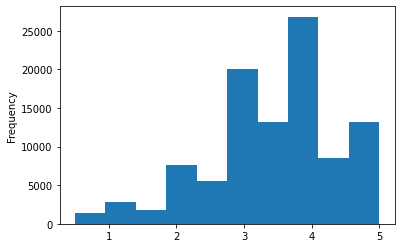

In [11]:
notas.nota.plot(kind='hist')

In [12]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

#### Usando a biblioteca Seaborn

In [13]:
import seaborn as sns

/home/leandro/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

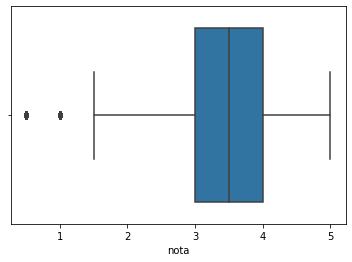

In [14]:
sns.boxplot(notas.nota)

In [26]:
 print("Media",notas.nota.mean())
 print("Mediana",notas.nota.median())

Media 3.501556983616962
Mediana 3.5


In [15]:
filmes = pd.read_csv('./bases/movies.csv')

In [17]:
filmes.columns = ['filmeId', 'titulo', 'generos']

In [18]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
notas.head()

,UsuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando algumas notas especificas por filme
#### O que aprendemos nesta aula:
* Trabalhar com query;
* O que são bins;
* Filtrar apenas uma coluna.

In [25]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [29]:
notas.query('filmeId==5').nota.median()

3.0

In [33]:
medias_por_filme = notas.groupby('filmeId').mean().nota

<AxesSubplot:ylabel='Frequency'>

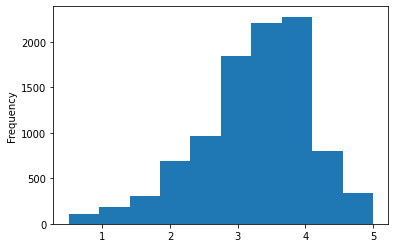

In [34]:
medias_por_filme.plot(kind='hist')

/home/leandro/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

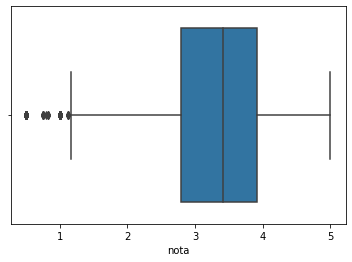

In [35]:
sns.boxplot(medias_por_filme)

/home/leandro/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

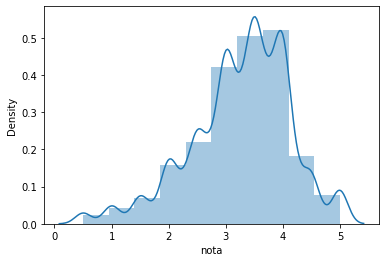

In [38]:
sns.distplot(medias_por_filme, bins=10)

In [42]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histograma das médias dos filmes')

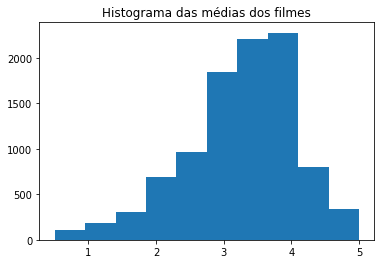

In [44]:
plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')